In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Question 1&2 Read and explore given dataset. Filter the data for users who hae rated more than 50 times

In [3]:
az=pd.read_csv('C:/Users/Faisal/R6_Residency/Reco_Project/ratings_Electronics.csv',names=['userid','productid','ratings','timestamp'])

In [5]:
az.head(5)

,userid,productid,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [21]:
az.dtypes
az.shape

(7824482, 3)

In [ ]:
az.drop('timestamp',axis=1,inplace=True)

In [35]:
print(az['userid'].value_counts().head(2))

A5JLAU2ARJ0BO    520
ADLVFFE4VBT8     501
Name: userid, dtype: int64


In [82]:
az1=az.where(az['userid'].value_counts()>50)
az1=az.groupby('userid').filter(lambda x: x['userid'].count() > 50)

In [84]:
az1.shape

(122171, 3)

In [85]:
az1['ratings'].isna().sum()

0

In [71]:
#az2=az.userid.value_counts()[az.userid.value_counts()>50].reset_index()

In [86]:
az1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ratings,122171.0,4.262616,1.058826,1.0,4.0,5.0,5.0,5.0


AxesSubplot(0.125,0.125;0.775x0.755)


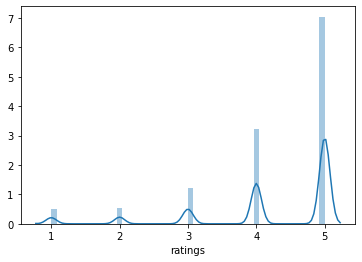

In [87]:
print(sns.distplot(az1['ratings']))

In [88]:
az1['ratings'].value_counts()

5.0    68872
4.0    31480
3.0    11747
2.0     5175
1.0     4897
Name: ratings, dtype: int64

In [89]:
print('Most of the products had been rated 5 followed by 4 then 3, 2 and 1')

Most of the products had been rated 5 followed by 4 then 3, 2 and 1


In [90]:
az1.groupby('productid')['ratings'].mean().head()  

productid
0594481813    3.0
0970407998    2.5
0972683275    5.0
1400501466    3.0
1400501520    5.0
Name: ratings, dtype: float64

In [95]:
az1.groupby('productid')['ratings'].mean().sort_values(ascending=False).head()

productid
B00LKG1MC8    5.0
B000H8WLKC    5.0
B000HA4EZK    5.0
B004EHZZDW    5.0
B004EI0EG4    5.0
Name: ratings, dtype: float64

In [92]:
az1.groupby('productid')['ratings'].count().sort_values(ascending=False).head()

productid
B0088CJT4U    204
B003ES5ZUU    177
B000N99BBC    163
B007WTAJTO    156
B00829TIEK    146
Name: ratings, dtype: int64

In [106]:
ratings_mean_count = pd.DataFrame(az1.groupby('productid')['ratings'].mean().sort_values(ascending=False)) 
ratings_mean_count['rating_counts'] = pd.DataFrame(az1.groupby('productid')['ratings'].count().sort_values(ascending=False))
ratings_mean_count.head()

,ratings,rating_counts
productid,,
B00LKG1MC8,5.0,1
B000H8WLKC,5.0,1
B000HA4EZK,5.0,1
B004EHZZDW,5.0,1
B004EI0EG4,5.0,1


In [147]:
az1.dtypes
#az1.drop('rating_counts',axis=1,inplace=True)

userid        object
productid     object
ratings      float64
dtype: object

In [149]:
az1['raw_ratings']=az1['ratings']
az1.head()
az1.drop('ratings',axis=1,inplace=True)
az1.head()

C:\Users\Faisal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,userid,productid,raw_ratings
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
631,A3TAS1AG6FMBQW,0972683275,5.0


### Transform data to surprise format

In [150]:
from surprise import SVD
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise.model_selection import train_test_split
from surprise import Dataset
from surprise import Reader

In [151]:
reader = Reader(rating_scale=(1, 5))
data=Dataset.load_from_df (az1, reader)

In [156]:
trainset, testset = train_test_split(data, test_size=.30)

In [158]:
trainset.ur

defaultdict(list,
            {0: [(0, 4.0),
              (2270, 5.0),
              (3302, 4.0),
              (4002, 5.0),
              (4140, 5.0),
              (6351, 4.0),
              (7748, 4.0),
              (2938, 4.0),
              (614, 5.0),
              (8286, 5.0),
              (8254, 4.0),
              (8668, 5.0),
              (8971, 4.0),
              (9856, 4.0),
              (10919, 4.0),
              (10945, 4.0),
              (11116, 5.0),
              (12092, 5.0),
              (12954, 2.0),
              (13515, 4.0),
              (7103, 5.0),
              (7380, 4.0),
              (8666, 5.0),
              (3039, 3.0),
              (7865, 5.0),
              (16070, 5.0),
              (1196, 4.0),
              (59, 3.0),
              (10004, 4.0),
              (14545, 3.0),
              (18430, 4.0),
              (18509, 5.0),
              (5276, 4.0),
              (18970, 4.0),
              (3763, 4.0),
              (9948, 4.0),
 

In [159]:
testset

[('AOMEH9W6LHC4S', 'B00004ZCJE', 4.0),
 ('A1A535TCGNMVPI', 'B000WS204Y', 3.0),
 ('ABAPF3XY1W6JX', 'B001HBJ0VQ', 1.0),
 ('AWNJAY0M5UI70', 'B0052MNIAA', 5.0),
 ('ACJT8MUC0LRF0', 'B00AASPQLU', 5.0),
 ('A1C47ROOK7BSVL', 'B000CD6B6W', 5.0),
 ('A3NYBI5VMVEEIK', 'B0032CP24W', 1.0),
 ('AP53MVRC8ZEW2', 'B002NO7PWC', 5.0),
 ('A1FF2PLA84KNAE', 'B007MYZE26', 5.0),
 ('A1UQUDT2Q0YENM', 'B003CFATT2', 5.0),
 ('A31RULW0KNYJ5H', 'B008OEHPKM', 5.0),
 ('A25HBO5V8S8SEA', 'B00004SCKA', 5.0),
 ('A3IOQ7NVVLAUEE', 'B000HVHYJW', 3.0),
 ('AEFTIUQHSVUFX', 'B005BTKQTA', 5.0),
 ('A214W7SK2DJQ99', 'B0050C9ZMC', 3.0),
 ('AGXMC3ITWZASE', 'B002M78J9S', 4.0),
 ('A3D5B2CBFNJB0K', 'B00000JGN9', 1.0),
 ('A30X750M8V1XXW', 'B001F7ARTQ', 4.0),
 ('A6FIAB28IS79', 'B002YAOS7A', 5.0),
 ('A27M75LRSJ788H', 'B004LTEUDO', 5.0),
 ('A1WXG10FJ353K0', 'B005KFONIU', 5.0),
 ('A1435P5AMCPB3X', 'B000Q8UAWY', 5.0),
 ('AY3D7DG5L5WCK', 'B002QQ7TLY', 5.0),
 ('A2C8I2RQ0WG940', 'B003AVMRPM', 5.0),
 ('A3FKQQTSMHOCE0', 'B0000ACOBG', 5.0),
 ('A2TN0U8

In [161]:
from surprise import SVD
from surprise import accuracy

In [162]:
# we can now query for specific predicions
userid = str('A3TA1UJWRJF9NC')  # raw user id
productid = str('B00284VD02')  # raw product id

In [164]:
from surprise import KNNWithMeans
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)
pred = algo.predict(userid, productid, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
user: A3TA1UJWRJF9NC item: B00284VD02 r_ui = None   est = 5.00   {'actual_k': 1, 'was_impossible': False}


In [166]:
test_pred = algo.test(testset)

In [167]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.0545


1.054500925728018

In [171]:
algo = SVD()
algo.fit(trainset)

In [172]:
testset = trainset.build_anti_testset()

In [174]:
testset

[('A1W415JP5WEAJK', 'B0051FWA7U', 4.2637308668249165),
 ('A1W415JP5WEAJK', 'B00AY1K50U', 4.2637308668249165),
 ('A1W415JP5WEAJK', 'B0020CT002', 4.2637308668249165),
 ('A1W415JP5WEAJK', 'B005JXH1OG', 4.2637308668249165),
 ('A1W415JP5WEAJK', 'B006MBP7T0', 4.2637308668249165),
 ('A1W415JP5WEAJK', 'B000VX6XL6', 4.2637308668249165),
 ('A1W415JP5WEAJK', 'B001PKTR76', 4.2637308668249165),
 ('A1W415JP5WEAJK', 'B000L8CNAG', 4.2637308668249165),
 ('A1W415JP5WEAJK', 'B0016D1UWC', 4.2637308668249165),
 ('A1W415JP5WEAJK', 'B000F7JCRA', 4.2637308668249165),
 ('A1W415JP5WEAJK', 'B002HGFKR8', 4.2637308668249165),
 ('A1W415JP5WEAJK', 'B00029U1DK', 4.2637308668249165),
 ('A1W415JP5WEAJK', 'B001CIVDU0', 4.2637308668249165),
 ('A1W415JP5WEAJK', 'B00EUFP39E', 4.2637308668249165),
 ('A1W415JP5WEAJK', 'B001DOQ3O4', 4.2637308668249165),
 ('A1W415JP5WEAJK', 'B00BLGUKEI', 4.2637308668249165),
 ('A1W415JP5WEAJK', 'B002H9RL5O', 4.2637308668249165),
 ('A1W415JP5WEAJK', 'B00BOHNYU6', 4.2637308668249165),
 ('A1W415J

In [ ]:
predictions = algo.test(testset)

In [ ]:
# get RMSE
print("SVD Model : Test Set")
accuracy.rmse(predictions, verbose=True)

In [ ]:
def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n